# import

In [1]:
import re
import os,subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import datetime
# in order to show the plots
%matplotlib inline

crab_word="365365"
crab_user = "x509up_u123238"# put here your crab user (the one that gets returned after voms etc etc)
subprocess.getstatusoutput("echo "+crab_word+" | voms-proxy-init -voms cms")

(0,
 'Enter GRID pass phrase for this identity:Contacting lcg-voms2.cern.ch:15002 [/DC=ch/DC=cern/OU=computers/CN=lcg-voms2.cern.ch] "cms"...\nRemote VOMS server contacted succesfully.\n\n\nCreated proxy in /tmp/x509up_u123238.\n\nYour proxy is valid until Mon Jul 05 06:01:55 CEST 2021')

In [64]:
# subprocess.call('dasgoclient --query="dataset dataset=/*/*Summer20UL*/NANOAODSIM" > ULSamples.txt', shell=True)
# ProcessedUL = open("ULSamples.txt",'r').readlines()
subprocess.call('dasgoclient --query="dataset dataset=/*/*Summer20UL18NanoAODv2*/NANOAODSIM" > ULSamples18.txt', shell=True)
ProcessedUL18 = open("ULSamples18.txt",'r').readlines()
subprocess.call('dasgoclient --query="dataset dataset=/*/*Summer20UL17NanoAODv2*/NANOAODSIM" > ULSamples17.txt', shell=True)
ProcessedUL17 = open("ULSamples17.txt",'r').readlines()
subprocess.call('dasgoclient --query="dataset dataset=/*/*Summer20UL16NanoAO*v2*/NANOAODSIM" > ULSamples16.txt', shell=True)
ProcessedUL16 = open("ULSamples16.txt",'r').readlines() 

# Readme
Search UL datasets
1. search by key words
    1. key words is a dic, like:<br>
        "VVV":{"elect":\[("WWW"),("ZZZ","TuneCP5")\],"exclude"\[("HZ", "HHH")\]}<br>
        means if ("WWW") or ("ZZZ","TuneCP5") in the datasets, will select this dataset<br>
        ("ZZZ","TuneCP5") means "ZZZ" and "TuneCP5" should both in the datasets name<br>
        ("HZ", "HHH") means if "HZ" and "HHH" both in the datasets name, this dataset will be excluded<br>
    2. Get_FullInformation_ForDataSets:
        1. return information we need for All datasets
            1. for one datasets
                1. 'info' keeps the list got from dasgoclient : \[{"file_size":147036563,"nblocks":1,"nevents":77000,"nfiles":1,"nlumis":77,"num_block":1,"num_event":77000,"num_file":1,"num_lumi":77}\]
                2. 'group' keeps the group information : 'VVV'
                3. DatasetName : '/ZZZ_TuneCP5_13TeV-amcatnlo-pythia8/RunIISummer20UL17NanoAODv2-106X_mc2017_realistic_v8-v1/NANOAODSIM'
2. store the information into table
    1. one group will be stored in one lattice

# simple example

## UL samples

### setup

#### 0lepton

In [111]:
# year = "16" ; 
# year = "17" ; 
year = "18" ; 
channel = "0Lepton"
ProcessedUL = eval("ProcessedUL"+year)

base_path = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/".format( channel = channel , year = year )
Text_file = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/samples.py".format( channel = channel , year = year )
Text_File = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/NanoAOD_v7_20{year}_missied.py".format( channel = channel , year = year )
Table_pngName = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/NanoAOD_v7_20{year}_missied.png".format( channel = channel , year = year )

TextFile_path = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/".format( channel = channel , year = year )
Text_file_v7 = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/NanoAOD_v7_20{year}.txt".format( channel = channel , year = year )
missed_text_file = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/NanoAOD_v7_20{year}_missied.py".format( channel = channel , year = year )

#### 1Lepton

In [44]:
year = "16" ; 
# year = "17" ; 
# year = "18" ; 
channel = "1Lepton"
ProcessedUL = eval("ProcessedUL"+year)
base_path = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/".format( channel = channel , year = year )
Text_file = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/samples.py".format( channel = channel , year = year )
Text_File = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/NanoAOD_v7_20{year}_missied.py".format( channel = channel , year = year )
Table_pngName = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/NanoAOD_v7_20{year}_missied.png".format( channel = channel , year = year )

TextFile_path = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/".format( channel = channel , year = year )
base_path = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/".format( channel = channel , year = year )
Text_file_v7 = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/NanoAOD_v7_20{year}.txt".format( channel = channel , year = year )
missed_text_file = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/NanoAOD_v7_20{year}_missied.py".format( channel = channel , year = year )

#### 2Lepton

In [120]:
# year = "16" ; 
year = "17" ; 
# year = "18" ; 
channel = "2Lepton_OS"
ProcessedUL = eval("ProcessedUL"+year)

base_path = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/".format( channel = channel , year = year )
Text_file = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/samples.py".format( channel = channel , year = year )
Text_File = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/NanoAOD_v7_20{year}_missied.py".format( channel = channel , year = year )
Table_pngName = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/NanoAOD_v7_20{year}_missied.png".format( channel = channel , year = year )

TextFile_path = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/".format( channel = channel , year = year )
base_path = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/".format( channel = channel , year = year )
Text_file_v7 = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/NanoAOD_v7_20{year}.txt".format( channel = channel , year = year )
missed_text_file = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/NanoAOD_v7_20{year}_missied.py".format( channel = channel , year = year )

#### 4Lepton

In [126]:
# year = "16" ; 
# year = "17" ; 
year = "18" ; 
channel = "4Lepton"
ProcessedUL = eval("ProcessedUL"+year)

base_path = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/".format( channel = channel , year = year )
Text_file = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/samples.py".format( channel = channel , year = year )
Text_File = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/NanoAOD_v7_20{year}_missied.py".format( channel = channel , year = year )
Table_pngName = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/NanoAOD_v7_20{year}_missied.png".format( channel = channel , year = year )

TextFile_path = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}".format( channel = channel , year = year )
base_path = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/".format( channel = channel , year = year )
Text_file_v7 = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/NanoAOD_v7_20{year}.txt".format( channel = channel , year = year )
missed_text_file = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/NanoAOD_v7_20{year}_missied.py".format( channel = channel , year = year )

### run

#### output for v7

mkdir -p /eos/user/q/qiguo/www/VVV/UL_samples/2Lepton_OS/16//2Lepton_OS_16_VVV/
mkdir -p /eos/user/q/qiguo/www/VVV/UL_samples/2Lepton_OS/16//2Lepton_OS_16_TT/
mkdir -p /eos/user/q/qiguo/www/VVV/UL_samples/2Lepton_OS/16//2Lepton_OS_16_TTV_TTVV/
mkdir -p /eos/user/q/qiguo/www/VVV/UL_samples/2Lepton_OS/16//2Lepton_OS_16_TWZ/
mkdir -p /eos/user/q/qiguo/www/VVV/UL_samples/2Lepton_OS/16//2Lepton_OS_16_VV/
mkdir -p /eos/user/q/qiguo/www/VVV/UL_samples/2Lepton_OS/16//2Lepton_OS_16_VVG/
mkdir -p /eos/user/q/qiguo/www/VVV/UL_samples/2Lepton_OS/16//2Lepton_OS_16_DY/
mkdir -p /eos/user/q/qiguo/www/VVV/UL_samples/2Lepton_OS/16//2Lepton_OS_16_GluGluH/
mkdir -p /eos/user/q/qiguo/www/VVV/UL_samples/2Lepton_OS/16//2Lepton_OS_16_ttH/
mkdir -p /eos/user/q/qiguo/www/VVV/UL_samples/2Lepton_OS/16//2Lepton_OS_16_ST/
mkdir -p /eos/user/q/qiguo/www/VVV/UL_samples/2Lepton_OS/16//2Lepton_OS_16_TG/
mkdir -p /eos/user/q/qiguo/www/VVV/UL_samples/2Lepton_OS/16//2Lepton_OS_16_VH/
mkdir -p /eos/user/q/qiguo/www/VVV/UL

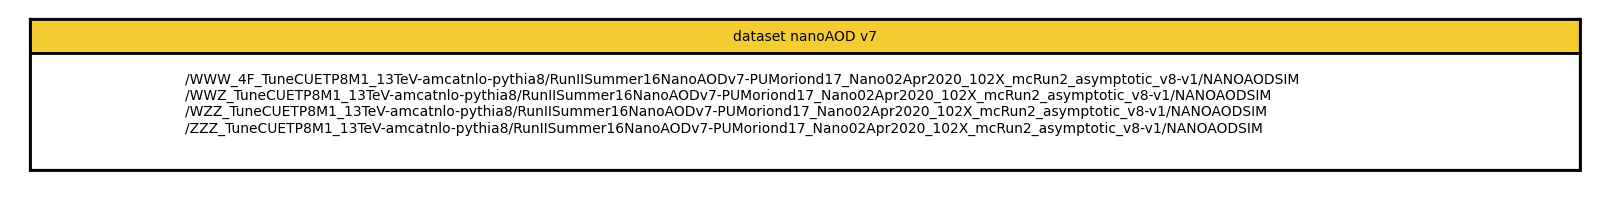

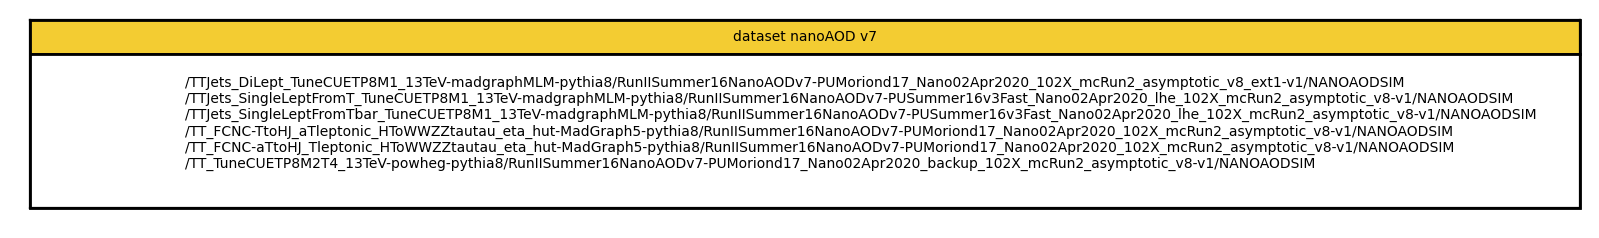

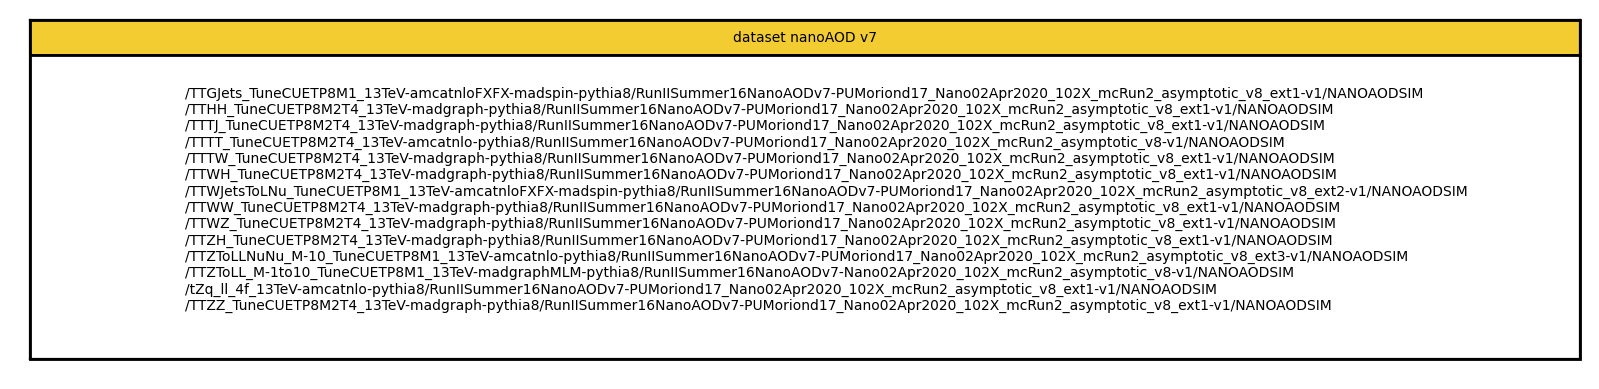

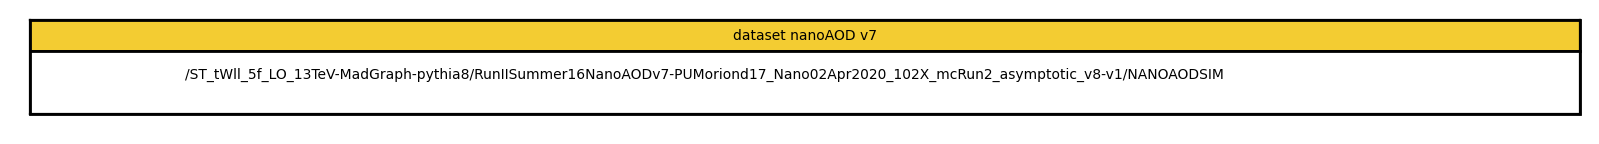

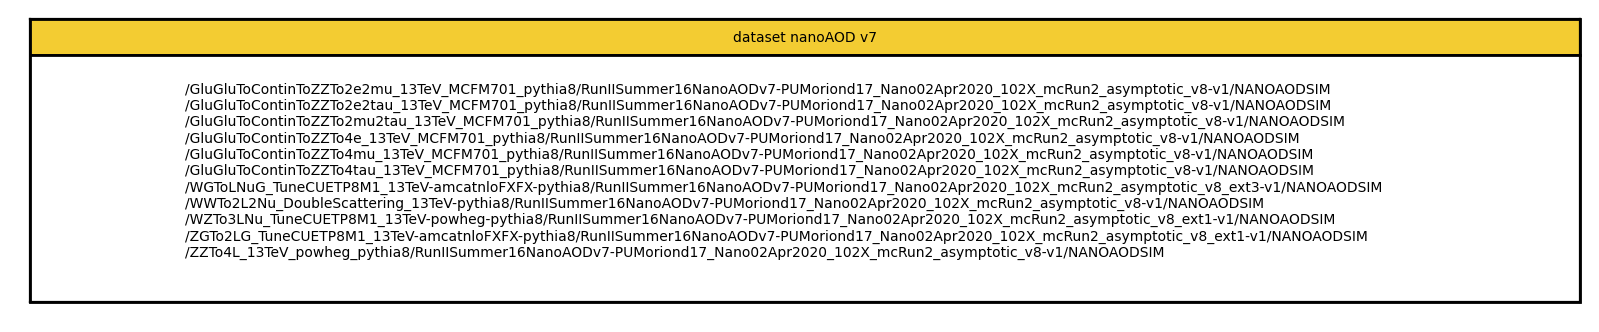

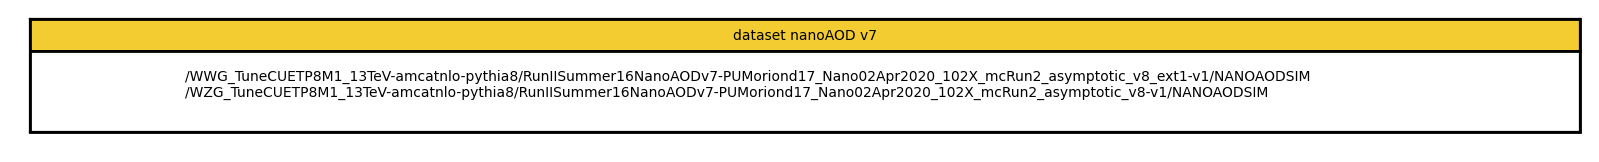

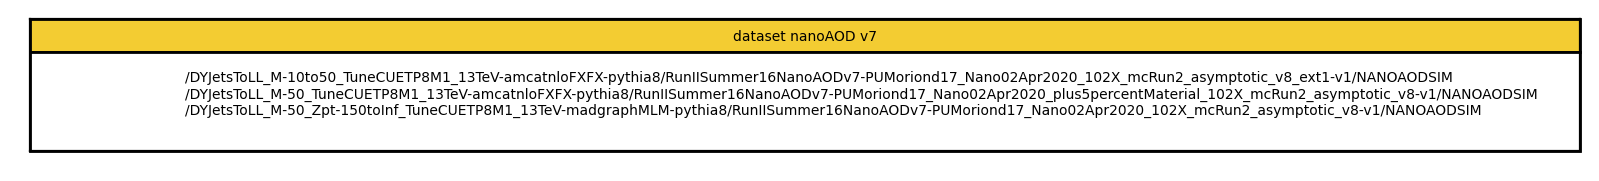

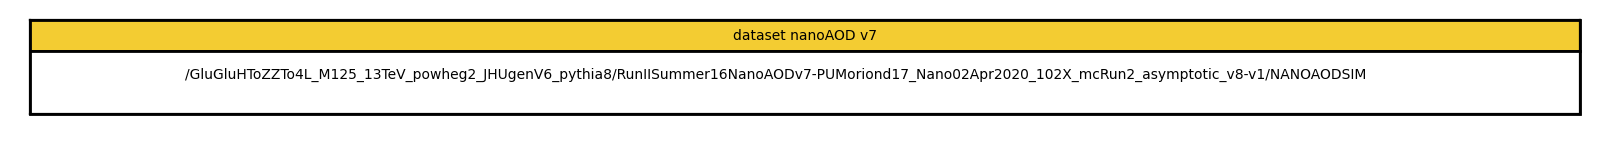

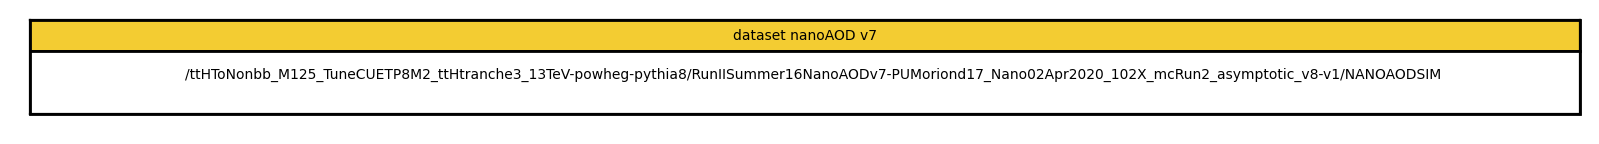

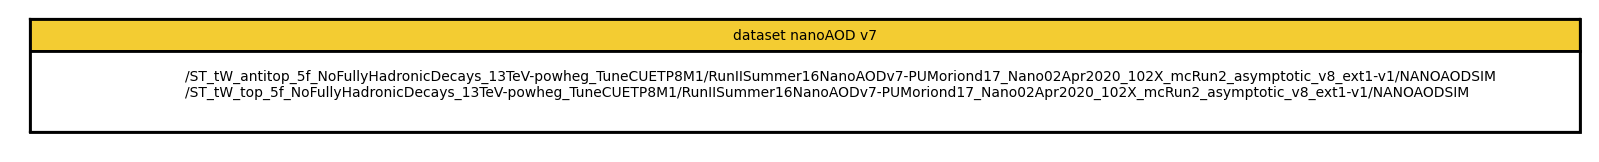

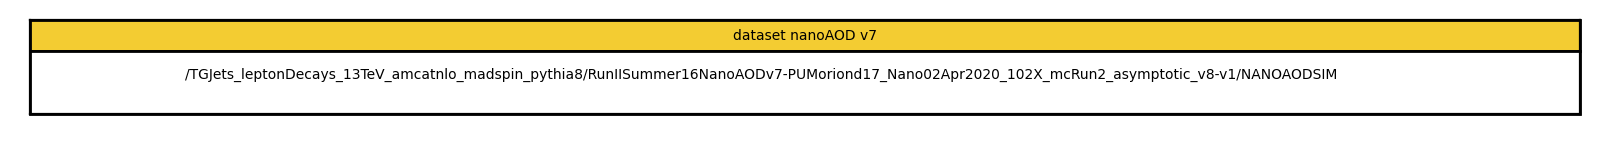

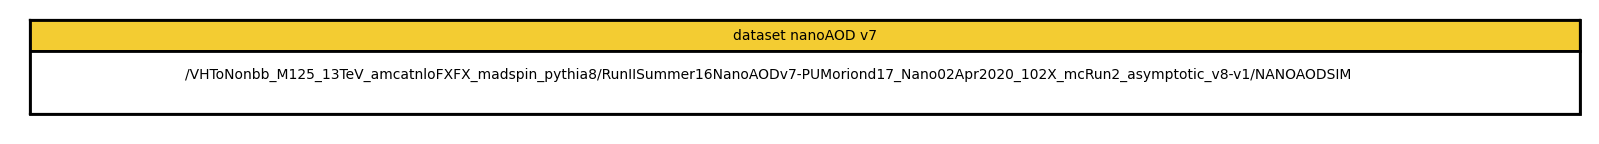

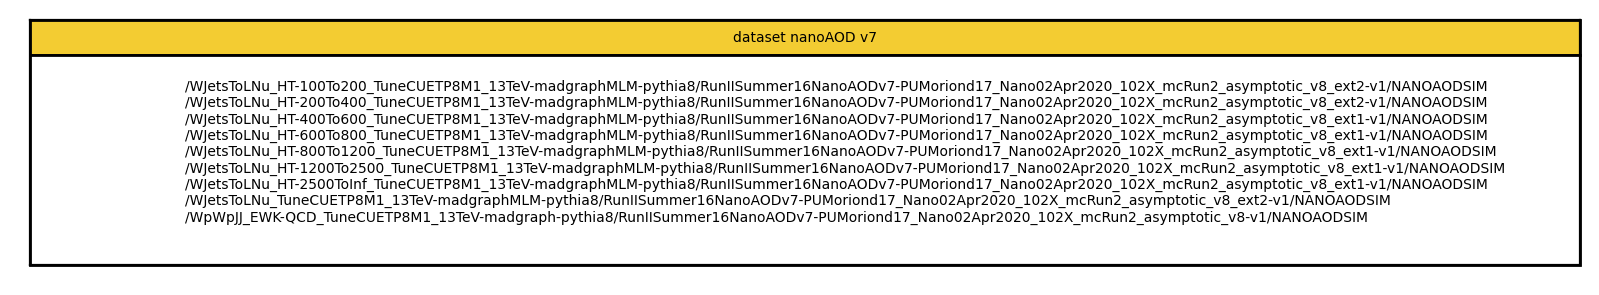

In [116]:
NanoAOD_v7_for_Comparison_ = NanoAOD_v7_for_Comparison( Text_file = Text_file_v7)
sample_dic = NanoAOD_v7_for_Comparison_.TextFile_To_dic()
missing_dic = NanoAOD_v7_for_Comparison_.Generate_TextFile_To_Pickup_Missed_File(sample_dic = sample_dic, missed_text_file = missed_text_file)
table_group = NanoAOD_v7_for_Comparison_.InfoForTable( sample_dic = sample_dic)
NanoAOD_v7_for_Comparison_.Mutiple_GroupTabel( table_group = table_group, colLabels = ["dataset nanoAOD v7"],  Table_dir = base_path)

#### keywords

In [89]:
KeyWords = {}

exec(open(base_path+"Keywords.py","r").read())
# PartOf_Group = ['1Lepton_18_EGamma','1Lepton_18_QCD_HT', '1Lepton_18_SingleMuon', '1Lepton_18_ST', '1Lepton_18_TT', "1Lepton_18_VV", ]
# KeyWords = dict([(key,KeyWords[key]) for key in PartOf_Group])
# if the tuple in the text only have one element and no comma in the end, the tuple will be read as string, not tuple
for group in KeyWords:
    for elect_exclude in KeyWords[group]:
        KeyWords_group_elect_exclude = KeyWords[group][elect_exclude] ; KeyWords[group][elect_exclude] = []
        for i in KeyWords_group_elect_exclude:
            if type(i) != type((1,2)):
                KeyWords[group][elect_exclude].append(tuple([i]))
            else:
                KeyWords[group][elect_exclude].append(i)
print(KeyWords)

{'4Lepton_16_VVV': {'elect': [('WWW',), ('WWZ',), ('WZZ',), ('ZZZ',), ('WWW', 'DiLeptonFilter'), ('WWZ', 'DiLeptonFilter'), ('WZZ', 'DiLeptonFilter'), ('ZZZ', 'DiLeptonFilter'), ('VHToNonbb',), ('HZJ_HToWW',), ('GluGluZH',)], 'exclude': []}, '4Lepton_16_TT': {'elect': [('TT', 'SemiLeptonic_'), ('TT', '2L2Nu')], 'exclude': [('Zprime',), ('RSG',), ('WZJJ',), ('VBS',), ('TTZ',), ('mtop',), ('width',), ('hdamp',), ('Njet',), ('Mtt',), ('CP5up',), ('CP5down',), ('TTG',), ('TTW',), ('TTbb',)]}, '4Lepton_16_TTV_TTVV': {'elect': [('TTW',), ('TTZ',), ('ttWJets',), ('ttZJets',), ('TTZToQQ',), ('TTWW',), ('TTWZ',), ('TTZZ',), ('TTZH',), ('TTWH',)], 'exclude': [('Zprime',), ('RSG',), ('VBS',), ('mtop',), ('width',), ('hdamp',), ('CP5up',), ('CP5down',)]}, '4Lepton_16_TWZ': {'elect': [('ST_tWll',)], 'exclude': [('Zprime',), ('RSG',), ('VBS',), ('mtop',), ('width',), ('hdamp',), ('CP5up',), ('CP5down',), ('TTWZ',)]}, '4Lepton_16_VV': {'elect': [('WW',), ('WZ',), ('ZZ',), ('GluGluToContinToZZ',)], 'e

#### UL datasets

In [90]:
Search_UL_datasets_ = Search_UL_datasets(ULDatasets = ProcessedUL, KeyWords = KeyWords)
UL_datasets_Weneed = Search_UL_datasets_.Search_dataset_By_KeyWords()
Search_UL_datasets_.Generate_Sample_py(Text_file = Text_file, UL_datasets_Weneed = UL_datasets_Weneed)
UL_datasets_Weneed

{'4Lepton_16_VVV': ['/GluGluZH_HToWW_ZTo2L_M-125_TuneCP5_13TeV-powheg-pythia8/RunIISummer20UL16NanoAODAPVv2-106X_mcRun2_asymptotic_preVFP_v9-v1/NANOAODSIM',
  '/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8/RunIISummer20UL16NanoAODAPVv2-106X_mcRun2_asymptotic_preVFP_v9-v1/NANOAODSIM',
  '/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8/RunIISummer20UL16NanoAODv2-106X_mcRun2_asymptotic_v15-v1/NANOAODSIM',
  '/WWZ_4F_TuneCP5_13TeV-amcatnlo-pythia8/RunIISummer20UL16NanoAODAPVv2-106X_mcRun2_asymptotic_preVFP_v9-v1/NANOAODSIM',
  '/WWZ_4F_TuneCP5_13TeV-amcatnlo-pythia8/RunIISummer20UL16NanoAODv2-106X_mcRun2_asymptotic_v15-v1/NANOAODSIM',
  '/WWZ_4F_TuneCP5_13TeV-amcatnlo-pythia8/RunIISummer20UL16NanoAODv2-106X_mcRun2_asymptotic_v15_ext1-v1/NANOAODSIM',
  '/WZZ_TuneCP5_13TeV-amcatnlo-pythia8/RunIISummer20UL16NanoAODv2-106X_mcRun2_asymptotic_v15-v1/NANOAODSIM',
  '/ZZZ_TuneCP5_13TeV-amcatnlo-pythia8/RunIISummer20UL16NanoAODAPVv2-106X_mcRun2_asymptotic_preVFP_v9-v1/NANOAODSIM',
  '/ZZZ_TuneCP5_13TeV-amcatnlo-py

#### UL tables

/GluGluZH_HToWW_ZTo2L_M-125_TuneCP5_13TeV-powheg-pythia8/RunIISummer20UL16NanoAODAPVv2-106X_mcRun2_asymptotic_preVFP_v9-v1/NANOAODSIM
/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8/RunIISummer20UL16NanoAODAPVv2-106X_mcRun2_asymptotic_preVFP_v9-v1/NANOAODSIM
/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8/RunIISummer20UL16NanoAODv2-106X_mcRun2_asymptotic_v15-v1/NANOAODSIM
/WWZ_4F_TuneCP5_13TeV-amcatnlo-pythia8/RunIISummer20UL16NanoAODAPVv2-106X_mcRun2_asymptotic_preVFP_v9-v1/NANOAODSIM
/WWZ_4F_TuneCP5_13TeV-amcatnlo-pythia8/RunIISummer20UL16NanoAODv2-106X_mcRun2_asymptotic_v15-v1/NANOAODSIM
/WWZ_4F_TuneCP5_13TeV-amcatnlo-pythia8/RunIISummer20UL16NanoAODv2-106X_mcRun2_asymptotic_v15_ext1-v1/NANOAODSIM
/WZZ_TuneCP5_13TeV-amcatnlo-pythia8/RunIISummer20UL16NanoAODv2-106X_mcRun2_asymptotic_v15-v1/NANOAODSIM
/ZZZ_TuneCP5_13TeV-amcatnlo-pythia8/RunIISummer20UL16NanoAODAPVv2-106X_mcRun2_asymptotic_preVFP_v9-v1/NANOAODSIM
/ZZZ_TuneCP5_13TeV-amcatnlo-pythia8/RunIISummer20UL16NanoAODv2-106X_mcRun2_asymptotic_v15-v

/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8/RunIISummer20UL16NanoAODv2-FlatPU0to75_106X_mcRun2_asymptotic_v15-v1/NANOAODSIM
/TTH_HToPsiPrimeG_PsiPrimeToMuMu_TuneCP5_13TeV-madgraph-pythia8/RunIISummer20UL16NanoAODv2-106X_mcRun2_asymptotic_v15-v1/NANOAODSIM
/ttHJetToNonbb_M125_TuneCP5_13TeV_amcatnloFXFX_madspin_pythia8/RunIISummer20UL16NanoAODAPVv2-106X_mcRun2_asymptotic_preVFP_v9-v1/NANOAODSIM
/ttHJetToNonbb_M125_TuneCP5_13TeV_amcatnloFXFX_madspin_pythia8/RunIISummer20UL16NanoAODv2-106X_mcRun2_asymptotic_v15-v1/NANOAODSIM
/ttHJetTobb_M125_TuneCP5_13TeV_amcatnloFXFX_madspin_pythia8/RunIISummer20UL16NanoAODAPVv2-106X_mcRun2_asymptotic_preVFP_v9-v1/NANOAODSIM
/ttHJetTobb_M125_TuneCP5_13TeV_amcatnloFXFX_madspin_pythia8/RunIISummer20UL16NanoAODv2-106X_mcRun2_asymptotic_v15-v1/NANOAODSIM
mkdir -p /eos/user/q/qiguo/www/VVV/UL_samples/4Lepton/16//4Lepton_16_VVV/
mkdir -p /eos/user/q/qiguo/www/VVV/UL_samples/4Lepton/16//4Lepton_16_TT/
mkdir -p /eos/user/q/qiguo/www/VVV/UL_samples/4Lepton/

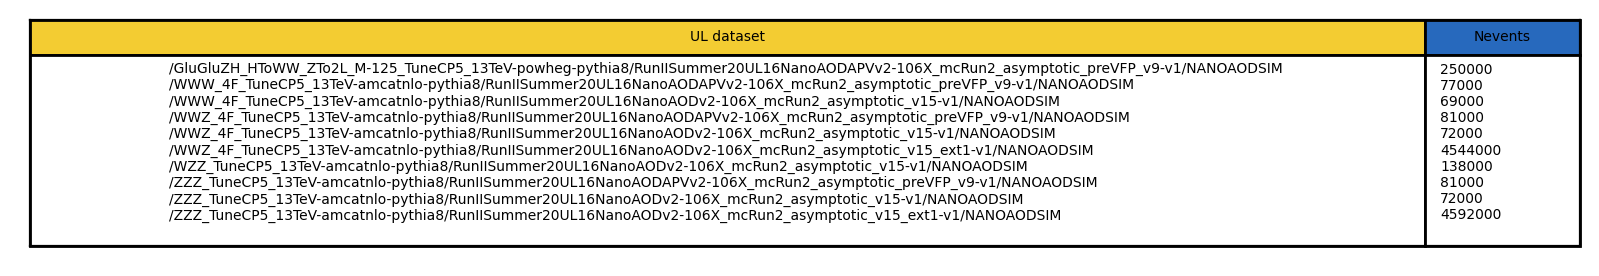

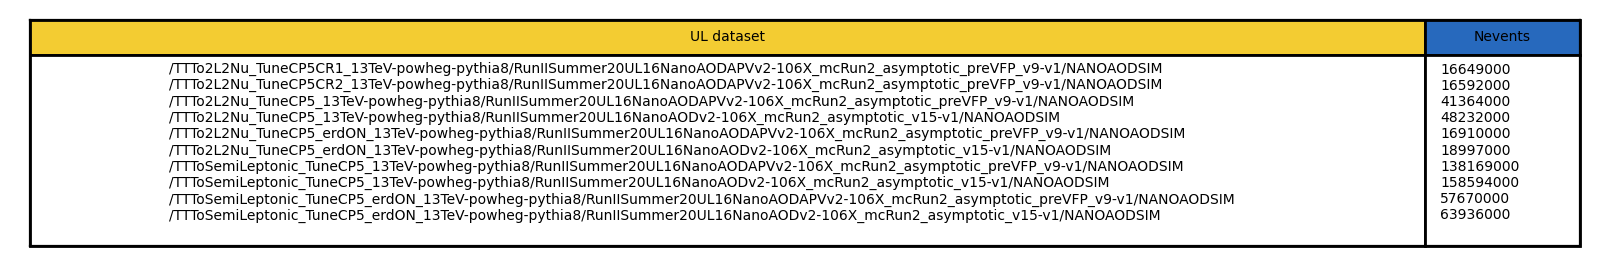

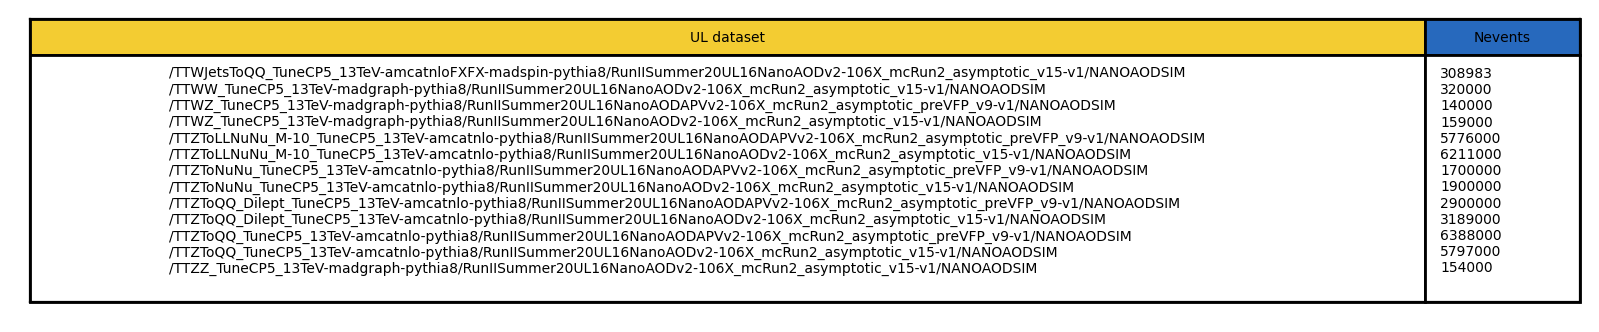

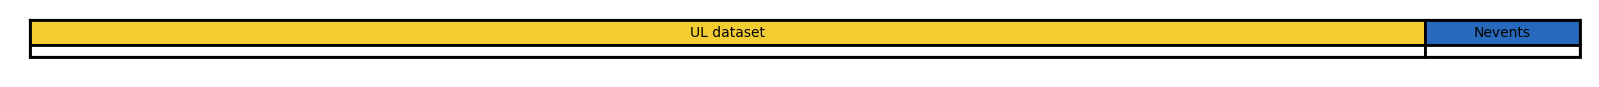

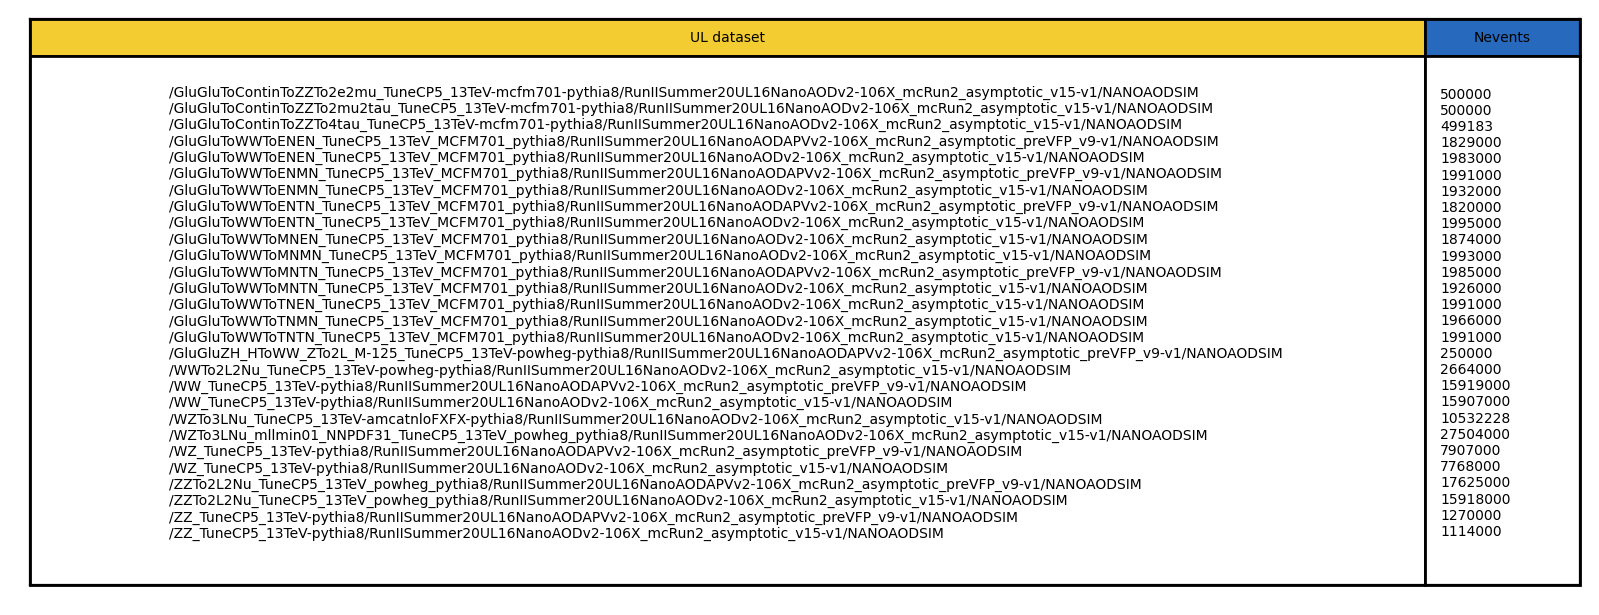

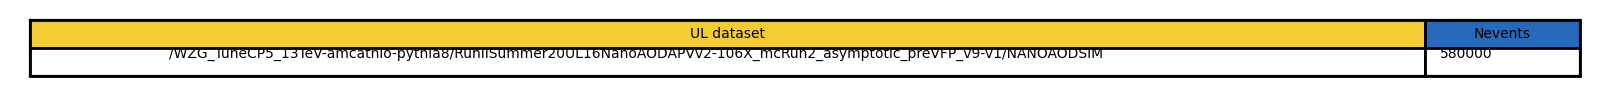

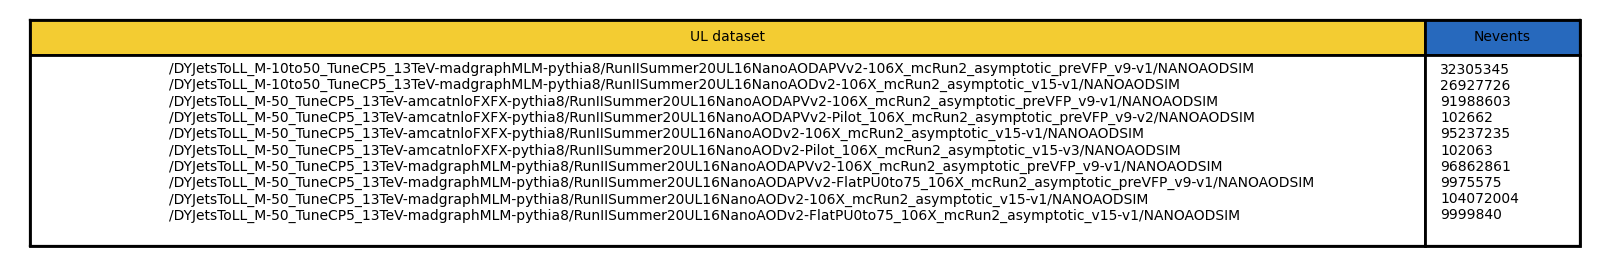

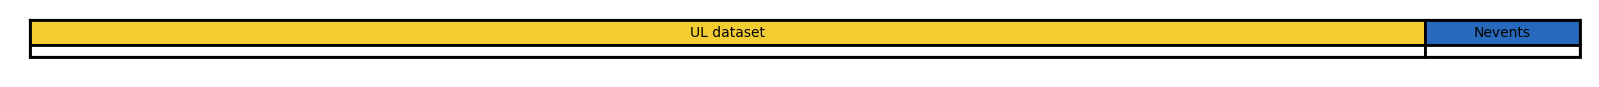

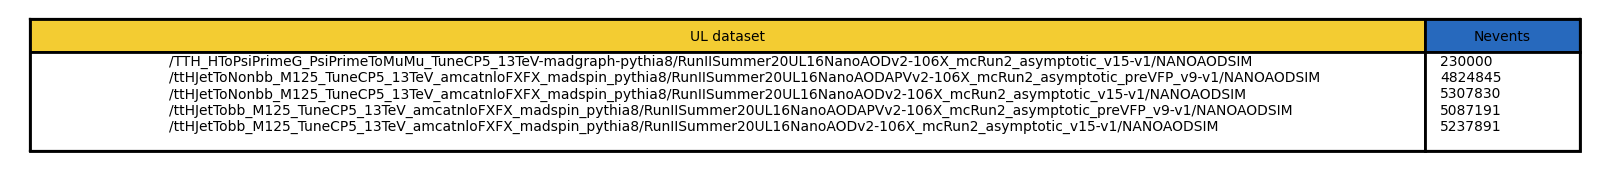

In [91]:
Summury = Search_UL_datasets_.Get_FullInformation_ForDataSets()
table = Search_UL_datasets_.InfoForTable()
Table_dir = base_path
Search_UL_datasets_.Mutiple_GroupTabel( Table_dir = Table_dir )

#### missing tables

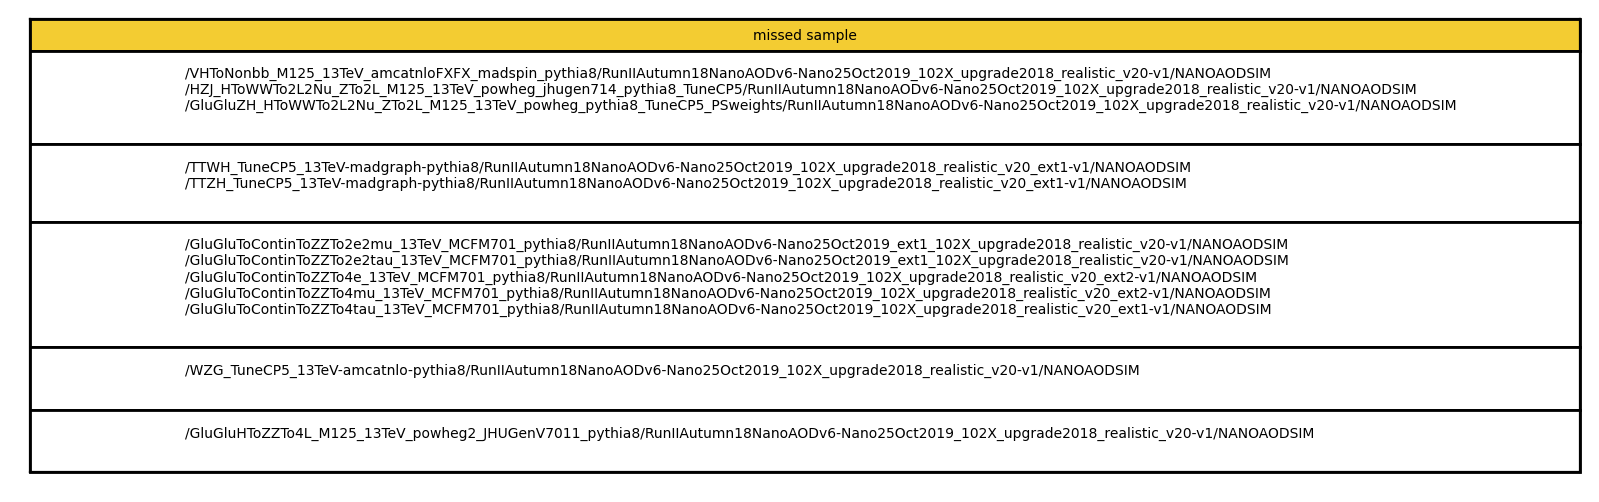

In [127]:
Pring_Missed_ULSamples_ = Pring_Missed_ULSamples(Text_File = missed_text_file)
table_group = Pring_Missed_ULSamples_.Table_info( )
Pring_Missed_ULSamples_.Mutiple_GroupTabel( table_group = table_group, colLabels = ["missed sample"],  Table_pngName = Table_pngName)

# define module

## search UL samples

In [16]:
class Search_UL_datasets():
    
    
    def __init__(self, **kwargs):
        self.ULDatasets = kwargs.get("ULDatasets",[])
        self.KeyWords = kwargs.get("KeyWords",[])
        self.tablecolumns = kwargs.get("tablecolumns",["UL dataset", "Nevents",'raw_height'])
        self.tablecolumns_for_plot = kwargs.get("tablecolumns_for_plot",['UL dataset','Nevents'])
        self.Table_dir = "Table/"
        
    def Search_dataset_By_KeyWords(self, **kwargs):
        KeyWords = kwargs.get("KeyWords",self.KeyWords)
        ULDatasets = kwargs.get("ULDatasets",self.ULDatasets)
        
        UL_datasets_Weneed = dict([(group,[]) for group in KeyWords])
        for dataset in ULDatasets:
            for group in KeyWords:
                elect_Words = KeyWords[group].get("elect",[])
                exclude_Words = KeyWords[group].get("exclude",[])
                # ielect : the element of the elect_Words and exclude_Words are list, ielect contains tuple
                # if all the words in the tuple is true, ielect is true
                # if one of the ielect is true, then elect the dataset
                if len(elect_Words) > 0:
                    Exclude_this_Dataset_Final = False
                    for iexclude in exclude_Words:
                        if len(iexclude) > 0 :
                            Exclude_this_Dataset = True
                            for iexclude_single in iexclude:
                                if iexclude_single not in dataset:
                                    Exclude_this_Dataset = False
                        if Exclude_this_Dataset : Exclude_this_Dataset_Final = True
                    if Exclude_this_Dataset_Final: continue
                    for ielect in elect_Words :
                        if (len(ielect) > 0) & (type(ielect) == type((1,2))):
                            ielect_this_Dataset = True
                            for ielect_single_words in ielect:
                                if ielect_single_words not in dataset:
                                    ielect_this_Dataset = False
                            if ielect_this_Dataset:
                                if (dataset.rstrip("\n")) not in UL_datasets_Weneed[group]:
                                    UL_datasets_Weneed[group].append(dataset.rstrip("\n"))
        self.UL_datasets_Weneed = UL_datasets_Weneed
        return UL_datasets_Weneed
                            
        
    def Get_FullInformation_ForDataSets(self, **kwargs):
        UL_datasets_Weneed = kwargs.get("UL_datasets_Weneed",self.UL_datasets_Weneed)
        
        appendText1='dasgoclient -query=\"summary dataset='
        datasets_List_Weneed = [] ; summury = {}
        
        for group in UL_datasets_Weneed:
            summury[group] = []
            for i in UL_datasets_Weneed[group]:
                print(i)
                info = subprocess.getstatusoutput(appendText1+i+'"')[1]
                if 'file_size' in info:
                    Info = {}; 
                    Info['info'] = eval(info) ; 
                    Info['group'] = group
                    Info['DatasetName'] = i
                    summury[group].append(Info)
        self.summury = summury
        return summury
        
        
    def InfoForTable(self, **kwargs):
        summury = kwargs.get("summury",self.summury)
        tablecolumns = kwargs.get("tablecolumns",self.tablecolumns)
        
        table_group = {}
        for group in summury:
            table_group[group] = dict([(columns,[]) for columns in tablecolumns])
            first = True ; notsave = True; group_height_in_table = len(summury[group])
            dataset_name_str = ''
            Nevents_str = ''
            group_str = ''
            if len(summury[group])>0:
                
                for datasetinfo in summury[group]:
                    dataset_name =  datasetinfo['DatasetName']
                    Nevents = datasetinfo['info'][0]['nevents']
                    group = datasetinfo['group']
                    dataset_name_str += dataset_name + '\n'
                    Nevents_str += str(Nevents)+'\n'
                    group_str += ''+'\n'
            table_group[group]['UL dataset'].append(dataset_name_str)
            table_group[group]['Nevents'].append(Nevents_str)
            table_group[group]['raw_height'].append(group_height_in_table)
        self.table = table_group
        return table_group
    
    def Mutiple_GroupTabel(self, **kwargs):
        Info_Table = kwargs.get("Info_Table",self.table)
        Table_dir = kwargs.get("Table_dir",self.Table_dir)
        table_group = kwargs.get("table_group",self.table)
        for group in table_group:
            Table_pngName = "{Table_dir}/{group}/{Table_name}.png".format(Table_dir = Table_dir, group = group, Table_name = group)
            Table_pngPath = "{Table_dir}/{group}/".format(Table_dir = Table_dir, group = group, Table_name = group)
            if not os.path.isfile(Table_pngPath):
                print("mkdir -p "+Table_pngPath)
                os.system("mkdir -p "+Table_pngPath)
            self.Generate_table(Info_Table = self.table[group] , sample_name = Table_pngName)
        
    
    def Generate_table(self, **kwargs):
        Info_Table = kwargs.get("Info_Table",)
        table_size = kwargs.get("table_size",(10,10))
        colLabels = kwargs.get("colLabels",self.tablecolumns_for_plot)
        colWidths = kwargs.get("colWidths",[0.9,0.1])
        sample_name = kwargs.get("sample_name","test.png")
        
        table_height = 0.1
    #     table_height = 0.3
        for i in Info_Table['raw_height']:
            table_height+=i*0.05
        table_height = table_height*2.5
        table_size = (10,table_height)
        fig,ax = plt.subplots(figsize = table_size , dpi=200)
        ax.set_title("",fontsize = 24)
        ax.xaxis.set_ticks([]) # remove x axis
        ax.yaxis.set_ticks([])
        df  =pd.DataFrame(Info_Table)[colLabels]
        table = ax.table(cellText = df.values,
                  cellLoc='left',
                  cellColours = None,
                  colColours=['#F3CC32', '#2769BD', '#DC3735'],
    #               colLabels = df.columns,
                  colLabels = colLabels,
    #               height=height,
                  colWidths = colWidths,
                  rowLoc='bottom',
                  loc='bottom',
                  bbox = [0,0,1,1],
                 )
        table.auto_set_font_size(False)
        table.set_fontsize(5)
        cellDict = table.get_celld()
        for i in range(0,len(df.columns)):
            cellDict[(0,i)].set_height(.1)
            for j in range(1,len(Info_Table['raw_height'])+1):
                cellDict[(j,i)].set_height(Info_Table['raw_height'][j-1]*0.05+0.05)
#         plt.show()
        plt.savefig(sample_name)
    
    def Generate_Sample_py(self, **kwargs):
        Text_file = kwargs.get("Text_file", "")
        UL_datasets_Weneed = kwargs.get("UL_datasets_Weneed", )
        Templete = kwargs.get("Templete", '        DBSSample(dataset="{dataset}")               : "",\n' )
        
        out_str = "data = {\n"
        for group in UL_datasets_Weneed:
            for ds in UL_datasets_Weneed[group]:
                out_str += Templete.format(dataset = ds)
        out_str += "}\n"
        
        with open(Text_file, "w") as f:
                f.write(out_str)
                
                


## Pring Missed ULSamples

In [107]:
class Pring_Missed_ULSamples():
    def __init__(self, **kwargs):
        self.Text_File = kwargs.get("Text_File","")
            
    def Table_info(self, **kwargs):
        Text_File = kwargs.get("Text_File",  self.Text_File)
        have_missing_file = False
        
        f = open(Text_File,"r")
        sample_dic_old = eval(f.read())
        sample_dic = {}
        for key in sample_dic_old:
            ds_list = []
            for j in sample_dic_old[key]:
                if  "miss" in sample_dic_old[key][j] :
                    have_missing_file = True
                    ds_list.append(j)
            if len(ds_list)>0:
                sample_dic[key] = ds_list
        
        table_group = {}
        for group in sample_dic:
            table_group[group] = {"dataset nanoAOD v7":[],"raw_height":[]}
            group_height_in_table = 2;
            dataset_name_str = ''
            for dataset in sample_dic[group]:
                dataset = dataset.replace(" ","").replace("\n","")
                if dataset:
                    dataset_name_str += dataset + '\n'
                    group_height_in_table += 1
            table_group[group]['dataset nanoAOD v7'].append(dataset_name_str)
            table_group[group]['raw_height'].append(group_height_in_table)
        
        return table_group
    
    def Mutiple_GroupTabel(self, **kwargs):
        Table_pngName = kwargs.get("Table_pngName", "")
        table_group = kwargs.get("table_group", "")
        colLabels = kwargs.get("colLabels", "")
        

        table_new = {}
        ds_new = [] ; height_new = [] ;
        for group in table_group:
            ds_new.append(table_group[group]['dataset nanoAOD v7'][0])
            height_new.append(table_group[group]['raw_height'][0])
        table_new['missed sample'] = ds_new
        table_new['raw_height'] = height_new
            
        self.Generate_table(Info_Table = table_new , sample_name = Table_pngName, colLabels = colLabels)
            
    def Generate_table(self, **kwargs):
        Info_Table = kwargs.get("Info_Table",)
        table_size = kwargs.get("table_size",(10,10))
        colLabels = kwargs.get("colLabels", [])
        colWidths = kwargs.get("colWidths",[1])
        sample_name = kwargs.get("sample_name","test.png")
        
        table_height = 0.1
    #     table_height = 0.3
        for i in Info_Table['raw_height']:
            table_height+=i*0.05
        table_height = table_height*2.5
        table_size = (10,table_height)
        fig,ax = plt.subplots(figsize = table_size , dpi=200)
        ax.set_title("",fontsize = 24)
        ax.xaxis.set_ticks([]) # remove x axis
        ax.yaxis.set_ticks([])
        df  =pd.DataFrame(Info_Table)[colLabels]
        table = ax.table(cellText = df.values,
                  cellLoc='left',
                  cellColours = None,
                  colColours=['#F3CC32', '#2769BD', '#DC3735'],
    #               colLabels = df.columns,
                  colLabels = colLabels,
    #               height=height,
                  colWidths = colWidths,
                  rowLoc='bottom',
                  loc='bottom',
                  bbox = [0,0,1,1],
                 )
        table.auto_set_font_size(False)
        table.set_fontsize(5)
        cellDict = table.get_celld()
        for i in range(0,len(df.columns)):
            cellDict[(0,i)].set_height(.1)
            for j in range(1,len(Info_Table['raw_height'])+1):
                cellDict[(j,i)].set_height(Info_Table['raw_height'][j-1]*0.05+0.05)
#         plt.show()
        plt.savefig(sample_name)

## put NanoAOD v7 sample for comparison

In [11]:
def remove_space(a):
    return a.replace(" ","").replace("\n","")

class NanoAOD_v7_for_Comparison():
    
    def __init__(self, **kwargs):
        self.NanoAOD_v7_info = {
            "Text_file" : kwargs.get("Text_file",""),
        }
    
    def TextFile_To_dic(self, **kwargs):
        Text_file = kwargs.get("Text_file", self.NanoAOD_v7_info["Text_file"])
        
        f = open(Text_file,"r")
        dic_str = ""
        for i in f.readlines():
            if len(i.replace(" ","").replace("\n","")) > 0:
                dic_str += i
        sample_dic_old = eval(dic_str)
        sample_dic = {}
        for key in sample_dic_old:
            sample_dic[key.replace(" ","")] = sample_dic_old[key]
        f.close()
        return sample_dic
    
    def InfoForTable(self, **kwargs):
        sample_dic = kwargs.get("sample_dic",  {})
        
        table_group = {}
        for group in sample_dic:
            table_group[group] = {"dataset nanoAOD v7":[],"raw_height":[]}
            group_height_in_table = 2;
            dataset_name_str = ''
            for dataset in sample_dic[group].split("\n"):
                dataset = dataset.replace(" ","").replace("\n","")
                if dataset:
                    dataset_name_str += dataset + '\n'
                    group_height_in_table += 1
            table_group[group]['dataset nanoAOD v7'].append(dataset_name_str)
            table_group[group]['raw_height'].append(group_height_in_table)
        self.table = table_group
        return table_group
    
    def Mutiple_GroupTabel(self, **kwargs):
        Table_dir = kwargs.get("Table_dir", "")
        table_group = kwargs.get("table_group", "")
        colLabels = kwargs.get("colLabels", "")
        
        for group in table_group:
            Table_pngName = "{Table_dir}/{group}/NanoAOD_v7{Table_name}.png".format(Table_dir = Table_dir, group = group, Table_name = group)
            Table_pngPath = "{Table_dir}/{group}/".format(Table_dir = Table_dir, group = group, Table_name = group)
            if not os.path.isfile(Table_pngPath):
                print("mkdir -p "+Table_pngPath)
                os.system("mkdir -p "+Table_pngPath)
            self.Generate_table(Info_Table = table_group[group] , sample_name = Table_pngName, colLabels = colLabels)
            
    def Generate_table(self, **kwargs):
        Info_Table = kwargs.get("Info_Table",)
        table_size = kwargs.get("table_size",(10,10))
        colLabels = kwargs.get("colLabels", [])
        colWidths = kwargs.get("colWidths",[1])
        sample_name = kwargs.get("sample_name","test.png")
        
        table_height = 0.1
    #     table_height = 0.3
        for i in Info_Table['raw_height']:
            table_height+=i*0.05
        table_height = table_height*2.5
        table_size = (10,table_height)
        fig,ax = plt.subplots(figsize = table_size , dpi=200)
        ax.set_title("",fontsize = 24)
        ax.xaxis.set_ticks([]) # remove x axis
        ax.yaxis.set_ticks([])
        df  =pd.DataFrame(Info_Table)[colLabels]
        table = ax.table(cellText = df.values,
                  cellLoc='left',
                  cellColours = None,
                  colColours=['#F3CC32', '#2769BD', '#DC3735'],
    #               colLabels = df.columns,
                  colLabels = colLabels,
    #               height=height,
                  colWidths = colWidths,
                  rowLoc='bottom',
                  loc='bottom',
                  bbox = [0,0,1,1],
                 )
        table.auto_set_font_size(False)
        table.set_fontsize(5)
        cellDict = table.get_celld()
        for i in range(0,len(df.columns)):
            cellDict[(0,i)].set_height(.1)
            for j in range(1,len(Info_Table['raw_height'])+1):
                cellDict[(j,i)].set_height(Info_Table['raw_height'][j-1]*0.05+0.05)
#         plt.show()
        plt.savefig(sample_name)
    
    def Generate_TextFile_To_Pickup_Missed_File(self, **kwargs):
        sample_dic = kwargs.get("sample_dic",  {})
        missed_text_file = kwargs.get("missed_text_file",  "")
        
        missed_dic = {}
        for group in sample_dic:
            missed_dic[group] = {}
            for ds in (sample_dic[group]).split("\n"):
                ds = remove_space(ds)
                if ds:
                    missed_dic[group][ds] = ""
                    
        missed_dic_text = "{\n"
        for i in missed_dic:
            missed_dic_text += '    "'+i+'":{\n'
            for j in missed_dic[i]:
                missed_dic_text += '         "'+j+'":"",\n'
            missed_dic_text += '    },\n'
        missed_dic_text += "}\n"
                    
        with open(missed_text_file,"w") as f:
            f.write(str(missed_dic_text))
                    
        return missed_dic

## sample.py to text

In [56]:
def Sample_To_TextFile(sample, debug = False):
    if debug:
        print('sample file :', sample)
    for i in open(sample,"r").readlines():
        if "DBSSample" in i:
            remove_Comment_out = re.compile(r'^((\s*)#)')
            catch_dataset = re.compile(r'dataset="(.*)"\)')
            remove = remove_Comment_out.search(i)
            if debug:
                if remove:
                    print("remove :",i)
            if not remove:
                print( catch_dataset.search(i).groups()[0] )

# prepare Text File

## 0lepnton

In [35]:
KeyWords = {}
base_path = "/eos/user/q/qiguo/www/VVV/UL_samples/0Lepton/18/"
exec(open(base_path+"Keywords.py","r").read())
List_1Lepton18 = [i for i in list(KeyWords.keys()) if "0Lepton_18" in i]
print('{')
for i in List_1Lepton18:
    print('"',i,'": """\n\n""",','\n\n')
print('}')

{
" 0Lepton_18_VVV ": """

""", 


" 0Lepton_18_WJets ": """

""", 


" 0Lepton_18_ZJets ": """

""", 


" 0Lepton_18_TT ": """

""", 


" 0Lepton_18_ST ": """

""", 


" 0Lepton_18_QCD_HT ": """

""", 


" 0Lepton_18_VV ": """

""", 


" 0Lepton_18_VH ": """

""", 


}


## 1lepnton

In [ ]:
KeyWords = {}
base_path = "/eos/user/q/qiguo/www/VVV/UL_samples/1Lepton/18/"
exec(open(base_path+"Keywords.py","r").read())
List_1Lepton18 = [i for i in list(KeyWords.keys()) if "1Lepton_18" in i]
print('{')
for i in List_1Lepton18:
    print('"',i,'": """\n\n""",','\n\n')
print('}')

## 2lepton_os

In [38]:
year = "18" ; channel = "2Lepton_OS"

KeyWords = {}
base_path = "/eos/user/q/qiguo/www/VVV/UL_samples/{channel}/{year}/".format( channel = channel , year = year )
exec(open(base_path+"Keywords.py","r").read())
List_ = [i for i in list(KeyWords.keys()) ]
print('{')
for i in List_:
    print('"',i,'": """\n\n""",','\n\n')
print('}')

{
" 2Lepton_OS_18_VVV ": """

""", 


" 2Lepton_OS_18_TT ": """

""", 


" 2Lepton_OS_18_TTV_TTVV ": """

""", 


" 2Lepton_OS_18_TWZ ": """

""", 


" 2Lepton_OS_18_VV ": """

""", 


" 2Lepton_OS_18_VVG ": """

""", 


" 2Lepton_OS_18_DY ": """

""", 


" 2Lepton_OS_18_GluGluH ": """

""", 


" 2Lepton_OS_18_ttH ": """

""", 


" 2Lepton_OS_18_ST ": """

""", 


" 2Lepton_OS_18_TG ": """

""", 


" 2Lepton_OS_18_VH ": """

""", 


" 2Lepton_OS_18_WJets ": """

""", 


}


In [65]:
# Sample_To_TextFile("/eos/user/q/qiguo/www/VVV/UL_samples/2Lepton_OS/18/sample.txt", debug = True)
Sample_To_TextFile("/eos/user/q/qiguo/www/VVV/UL_samples/2Lepton_OS/16/sample.txt")

/DYJetsToLL_M-10to50_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/RunIISummer16NanoAODv7-PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8_ext1-v1/NANOAODSIM
/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/RunIISummer16NanoAODv7-PUMoriond17_Nano02Apr2020_plus5percentMaterial_102X_mcRun2_asymptotic_v8-v1/NANOAODSIM
/DYJetsToLL_M-50_Zpt-150toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/RunIISummer16NanoAODv7-PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8-v1/NANOAODSIM
/GluGluHToZZTo4L_M125_13TeV_powheg2_JHUgenV6_pythia8/RunIISummer16NanoAODv7-PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8-v1/NANOAODSIM
/GluGluToContinToZZTo2e2mu_13TeV_MCFM701_pythia8/RunIISummer16NanoAODv7-PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8-v1/NANOAODSIM
/GluGluToContinToZZTo2e2tau_13TeV_MCFM701_pythia8/RunIISummer16NanoAODv7-PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8-v1/NANOAODSIM
/GluGluToContinToZZTo2mu2tau_13TeV_MCFM701_pythia8/RunIISummer16NanoAODv7-PUMoriond17_Nano02Apr2020_1

## 4lepnton

In [175]:
KeyWords = {}
base_path = "/eos/user/q/qiguo/www/VVV/UL_samples/4Lepton/18/"
exec(open(base_path+"Keywords.py","r").read())
List_1Lepton18 = [i for i in list(KeyWords.keys()) if "4Lepton_18" in i]
print('{')
for i in List_1Lepton18:
    print('"',i,'": """\n\n""",','\n\n')
print('}')

{
" 4Lepton_18_VVV ": """

""", 


" 4Lepton_18_TT ": """

""", 


" 4Lepton_18_TTV_TTVV ": """

""", 


" 4Lepton_18_TWZ ": """

""", 


" 4Lepton_18_VV ": """

""", 


" 4Lepton_18_VVG ": """

""", 


" 4Lepton_18_DY ": """

""", 


" 4Lepton_18_GluGluH ": """

""", 


" 4Lepton_18_ttH ": """

""", 


}


In [85]:
Sample_To_TextFile("/eos/user/q/qiguo/www/VVV/UL_samples/4Lepton/16/sample.txt")

/WWW_4F_DiLeptonFilter_TuneCUETP8M1_13TeV-amcatnlo-pythia8/RunIISummer16NanoAODv6-PUMoriond17_Nano25Oct2019_102X_mcRun2_asymptotic_v7-v1/NANOAODSIM
/WWW_4F_TuneCUETP8M1_13TeV-amcatnlo-pythia8/RunIISummer16NanoAODv6-PUMoriond17_Nano25Oct2019_102X_mcRun2_asymptotic_v7-v1/NANOAODSIM
/WWZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/RunIISummer16NanoAODv6-PUMoriond17_Nano25Oct2019_102X_mcRun2_asymptotic_v7-v1/NANOAODSIM
/WZZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/RunIISummer16NanoAODv6-PUMoriond17_Nano25Oct2019_102X_mcRun2_asymptotic_v7-v1/NANOAODSIM
/ZZZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8/RunIISummer16NanoAODv6-PUMoriond17_Nano25Oct2019_102X_mcRun2_asymptotic_v7-v1/NANOAODSIM
/VHToNonbb_M125_13TeV_amcatnloFXFX_madspin_pythia8/RunIISummer16NanoAODv6-PUMoriond17_Nano25Oct2019_102X_mcRun2_asymptotic_v7-v1/NANOAODSIM
/HZJ_HToWWTo2L2Nu_ZTo2L_M125_13TeV_powheg_pythia8/RunIISummer16NanoAODv6-PUMoriond17_Nano25Oct2019_102X_mcRun2_asymptotic_v7-v1/NANOAODSIM
/GluGluZH_HToWWTo2L2Nu_ZTo2L_M125_13TeV_powheg_pyt